 # <center>House price prediction in King County, US</center>

### <center>select the best prediction model</center>

### <center>By **Noé Kokou ACHIBE** </center>

In [65]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler

#import metrics for evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


#choice a best model

from sklearn.model_selection import GridSearchCV

In [66]:
df=pd.read_csv("kc_house_data.csv", parse_dates=['date'])

<Axes: xlabel='month'>

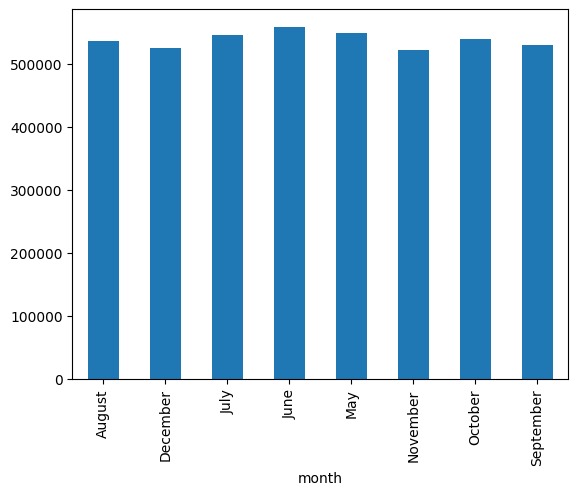

In [67]:
#Ectract year month in the sale date
df['year'] = pd.to_datetime(df['date']).dt.year
df['month'] = pd.to_datetime(df['date']).dt.month_name()
df[df['year']==2014].groupby('month')['price'].mean().plot(kind='bar')

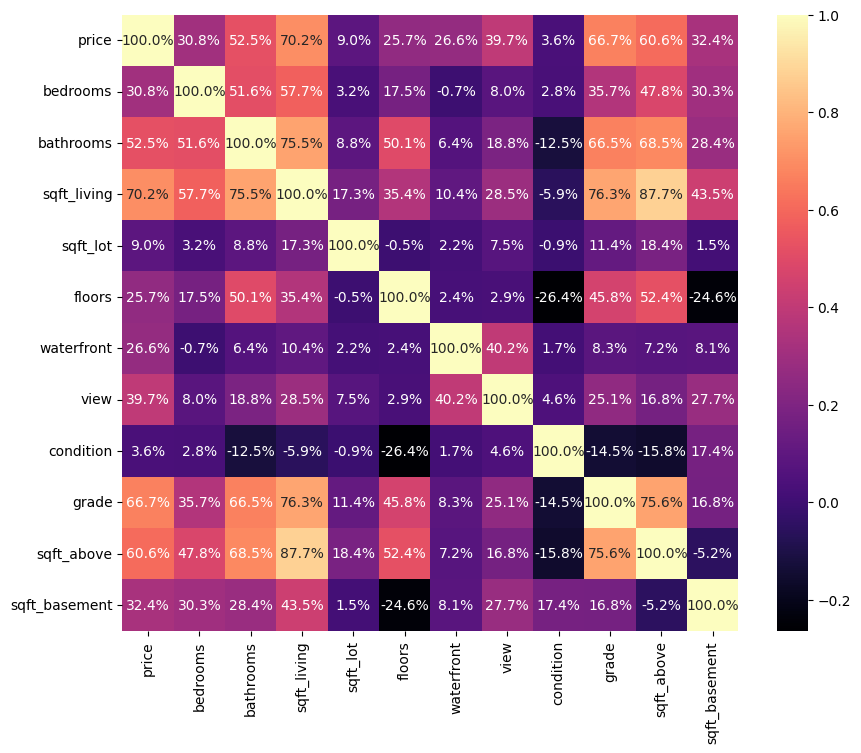

In [68]:
### Visualization of the correlations between the target variable 'charges' and the other variables
cordf=df[['price','bedrooms', 'bathrooms', 'sqft_living','sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade','sqft_above', 'sqft_basement']]
     
cordf.corr()['price'].sort_values()
f, ax = plt.subplots(figsize=(10,8))
corr = cordf.corr()
sns.heatmap(corr, cbar=True, square= True, fmt='.1%', annot=True, cmap='magma')      #'Greens'

del cordf

In [69]:
#Choose feactures variables
dfh=df[['price', 'bedrooms', 'bathrooms', 'sqft_living','sqft_lot', 'floors',
'waterfront', 'condition', 'grade','sqft_above','sqft_basement','lat', 'long', 'sqft_living15','sqft_lot15']]

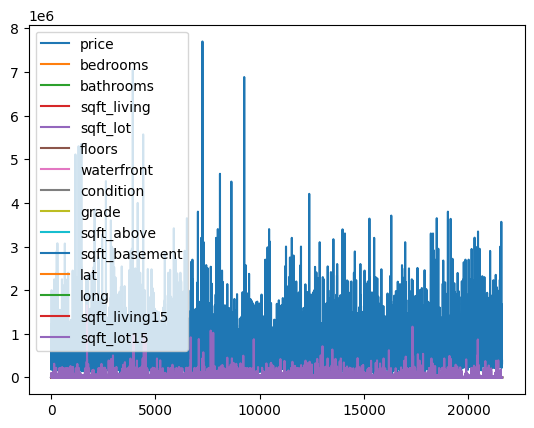

In [70]:
#Evolution of all variables
plt.plot(dfh)
plt.legend(dfh.columns)

In [71]:
X=dfh.drop(['price'],axis=1)
y=dfh['price']

In [72]:
X_train,X_test, y_train, y_test=train_test_split(X,y, test_size=0.2,random_state=0)

In [73]:
reg=LinearRegression()
dtreg=DecisionTreeRegressor()
svr_reg=SVR()
gbreg=GradientBoostingRegressor()

In [74]:
dict_models={'lineaire regression':reg,'Decision Tree regression':dtreg,'SVR regression':svr_reg,'Gradient Boosting Regression':gbreg}

In [75]:
mse = mean_squared_error
mae = mean_absolute_error
r2 = r2_score

In [76]:
dict_metrics={"Mean squared error": mse,"Mean absolute error":mae,"R2 score":r2}

**Regression with no normalize data**

In [77]:
def Evaluation(dict_models,dict_metrics):
    for name, model in dict_models.items():
        print(name)
        y_pred=model.fit(X_train,y_train).predict(X_test)
        for name, metric in dict_metrics.items():
            print(name, " : ",metric(y_test,y_pred))

In [78]:
Evaluation(dict_models,dict_metrics)

lineaire regression
Mean squared error  :  41111505447.1686
Mean absolute error  :  132229.19034753783
R2 score  :  0.6543051667223728
Decision Tree regression
Mean squared error  :  27732199753.075294
Mean absolute error  :  96632.32801295396
R2 score  :  0.7668079029024836
SVR regression


Mean squared error  :  124724887845.14003
Mean absolute error  :  215391.83605118855
R2 score  :  -0.0487757341945243
Gradient Boosting Regression
Mean squared error  :  16308297448.864027
Mean absolute error  :  76495.68800941773
R2 score  :  0.8628682139876424


From these results, we can see that:

Decision Tree Regression and Gradient Boosting Regression have the lowest mean squared errors, indicating better model fit compared to Linear Regression and SVR.
Gradient Boosting Regression has the highest R², meaning it explains a larger proportion of the variance in the data compared to other models.
SVR seems to not fit the data properly, as indicated by the negative R², suggesting poor performance in this particular case.

**Regression with normalize data**

In [79]:
# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit and transform your DataFrame
dfh_scaled = scaler.fit_transform(dfh)
dfhnorm=pd.DataFrame(dfh_scaled,columns=dfh.columns)

In [80]:
X=dfhnorm.drop(['price'],axis=1)
y=dfhnorm['price'] # 

In [81]:
X_train,X_test, y_train, y_test=train_test_split(X,y, test_size=0.2,random_state=0)

In [82]:
Evaluation(dict_models,dict_metrics)

lineaire regression
Mean squared error  :  0.30501464254016597
Mean absolute error  :  0.3601178707251798
R2 score  :  0.6543287834602316
Decision Tree regression


Mean squared error  :  0.19728594509952557
Mean absolute error  :  0.2596316647416349
R2 score  :  0.7764170530279688
SVR regression
Mean squared error  :  0.18432893601878766
Mean absolute error  :  0.22139177694743267
R2 score  :  0.7911011516481382
Gradient Boosting Regression
Mean squared error  :  0.12055786510209092
Mean absolute error  :  0.20815731640743587
R2 score  :  0.8633725137055042


Data normalization improved the results of the SVR regression model and now places it in second position after the Gradient regression model. On the other hand, the R scores of linear regression and decision tree regression have decreased significantly. Only Gradient regression was able to maintain its R score in both cases.

### Best regression with hyperparameters

In [83]:
seed=42

X_train,X_test, y_train, y_test=train_test_split(X,y, test_size=0.2,random_state=seed)

In [84]:
# Définide hyperparameters
parameters = {
    'n_estimators': [10, 25, 50],
    'max_depth': [5, 10, 20],
    'min_samples_split': [5, 10, 20],
    'min_samples_leaf': [1, 2, 4]
}

# Create GridSearchCV object with gradient boosting modèle

best_gbreg = GridSearchCV(gbreg, parameters, scoring='neg_mean_squared_error')


In [85]:
best_gbreg.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [5, 10, 20],
                         'n_estimators': [10, 25, 50]},
             scoring='neg_mean_squared_error')

In [86]:
best_gbreg.best_estimator_

GradientBoostingRegressor(max_depth=5, min_samples_leaf=4, min_samples_split=20,
                          n_estimators=50)

In [87]:
y_pred=best_gbreg.predict(X_test)

In [88]:
print("R score \n : ",r2(y_pred,y_test))

R score 
 :  0.8471895541442953
